# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nabila Lailatanzila
- **Email:** nabila5des@gmail.com
- **ID Dicoding:** nabilaalt

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda pada hari kerja (workingday), hari libur(holiday), dan hari biasa(weekday)?
- Pada periode waktu manakah—pagi, siang, sore, atau malam—penyewaan sepeda paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

In [4]:
#Memuat tabel penyewaan sepeda per hari
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

Menilai Data Perhari

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset berisi data harian selama 2 tahun (731 hari), yang menunjukkan data lengkap tanpa adanya missing values.
- Dataset tidak memiliki duplikat
- Terdapat ketidakefektifan dalam mendeklarasikan tipe data seperti:
      1.   Kolom dteday bertipe object (string) yang seharusnya dikonversi ke datetime
      2.   Kolom season, month, holiday, weekday, workingday, weathersit bertipe int64, bisa dikonversi ke kategori agar lebih efisien.

Menilai Tabel Penyewaan Sepeda Perjam

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:

print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Untuk meningkatkan kualitas data sehingga hasil analisis yang dihasilkan lebih akurat, maka dari itu diperlukan pembersihan data.
Adapun langkah-langkah yang dapat dilakukan yaitu:



1.   Meningkatkan readability dengan mengganti nama kolom dengan nama yang lebih deskriptif


In [ ]:
rename_cols = {
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'cnt': 'total_rentals'
}

hour_df.rename(columns=rename_cols, inplace=True)
day_df.rename(columns={k: v for k, v in rename_cols.items() if k != 'hr'}, inplace=True)

In [ ]:
print(hour_df.head())

   instant      dteday  season  year  month  hour  holiday  weekday  \
0        1  2011-01-01       1     0      1     0        0        6   
1        2  2011-01-01       1     0      1     1        0        6   
2        3  2011-01-01       1     0      1     2        0        6   
3        4  2011-01-01       1     0      1     3        0        6   
4        5  2011-01-01       1     0      1     4        0        6   

   workingday  weathersit  temp   atemp  humidity  windspeed  casual  \
0           0           1  0.24  0.2879      0.81        0.0       3   
1           0           1  0.22  0.2727      0.80        0.0       8   
2           0           1  0.22  0.2727      0.80        0.0       5   
3           0           1  0.24  0.2879      0.75        0.0       3   
4           0           1  0.24  0.2879      0.75        0.0       0   

   registered  total_rentals  
0          13             16  
1          32             40  
2          27             32  
3          10   

2. Mengubah angka menjadi keterangan yang lebih mudah dipahami pembaca

In [ ]:
season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

month = {1: 'Januari', 2: 'Februari', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
         7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

weekday = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

weathersit = {1: 'Clear', 2: 'Mist', 3: 'Light rain', 4: 'Heavy Rain'}

workingday = {0: 'No', 1: 'Yes'}

holiday = {0: 'No', 1: 'Yes'}

In [ ]:
hour_df['season'] = hour_df['season'].map(season)
hour_df['month'] = hour_df['month'].map(month)
hour_df['weekday'] = hour_df['weekday'].map(weekday)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit)
hour_df['workingday'] = hour_df['workingday'].map(workingday)
hour_df['holiday'] = hour_df['holiday'].map(holiday)

In [ ]:
day_df['season'] = day_df['season'].map(season)
day_df['month'] = day_df['month'].map(month)
day_df['weekday'] = day_df['weekday'].map(weekday)
day_df['weathersit'] = day_df['weathersit'].map(weathersit)
day_df['workingday'] = day_df['workingday'].map(workingday)
day_df['holiday'] = day_df['holiday'].map(holiday)

3. Mengubah tipe data yang kurang sesuai

In [ ]:
datetime_column = ["dteday"]

for column in datetime_column:
  hour_df[column] = pd.to_datetime(hour_df[column])
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         17379 non-null  datetime64[ns]
 1   season         17379 non-null  object        
 2   year           17379 non-null  int64         
 3   month          17379 non-null  object        
 4   hour           17379 non-null  int64         
 5   holiday        17379 non-null  object        
 6   weekday        17379 non-null  object        
 7   workingday     17379 non-null  object        
 8   weathersit     17379 non-null  object        
 9   casual         17379 non-null  int64         
 10  registered     17379 non-null  int64         
 11  total_rentals  17379 non-null  int64         
 12  time_of_day    17379 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 1.7+ MB


4. Menghapus kolom yang tidak relevan dengan pertanyaan bisnis yang telah ditetapkan.

In [ ]:
drop_col = ['instant', 'windspeed', 'temp', 'atemp', 'humidity']

day_df.drop(columns=set(drop_col) & set(day_df.columns), inplace=True)
hour_df.drop(columns=set(drop_col) & set(hour_df.columns), inplace=True)

day_df.head(), hour_df.head()

(      dteday  season  year    month holiday    weekday workingday weathersit  \
 0 2011-01-01  Spring     0  Januari      No   Saturday         No       Mist   
 1 2011-01-02  Spring     0  Januari      No     Sunday         No       Mist   
 2 2011-01-03  Spring     0  Januari      No     Monday        Yes      Clear   
 3 2011-01-04  Spring     0  Januari      No    Tuesday        Yes      Clear   
 4 2011-01-05  Spring     0  Januari      No  Wednesday        Yes      Clear   
 
    casual  registered  total_rentals  
 0     331         654            985  
 1     131         670            801  
 2     120        1229           1349  
 3     108        1454           1562  
 4      82        1518           1600  ,
       dteday  season  year    month  hour holiday   weekday workingday  \
 0 2011-01-01  Spring     0  Januari     0      No  Saturday         No   
 1 2011-01-01  Spring     0  Januari     1      No  Saturday         No   
 2 2011-01-01  Spring     0  Januari     2    

**Insight:**
- Meningkatkan readability dengan mengganti nama kolom dengan nama yang lebih deskriptif
- Mengubah angka menjadi keterangan yang lebih mudah dipahami pembaca
- Mengubah tipe data yang kurang sesuai
- Menghapus kolom yang tidak relevan dengan pertanyaan bisnis yang telah ditetapkan.

## Exploratory Data Analysis (EDA)

In [ ]:
df = hour_df
df.describe(include="all")

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,casual,registered,total_rentals
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN
top,NaN,Fall,NaN,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,NaN,NaN,NaN,NaN,367.000000,886.000000,977.000000


**Insight:**
- Rata-rata total penyewaan sepeda adalah 189 per jam.  
- Distribusi penyewaan sangat bervariasi dengan minimal dan maksimal 977 (puncak penggunaan sepeda)  
- Standar deviasi bernilai 181, menunjukkan variasi yang tinggi dalam jumlah penyewaan

### Mengeksplorasi Data day_df

1.   Mengelompokan penyewa berdasarkan bulan

In [ ]:
day_df.groupby(by='month').agg({
    'total_rentals': ['max', 'min', 'mean', 'sum']
}).rename(columns={'total_rentals': 'count'})

count                           
            max   min         mean     sum
month                                     
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
Februari   5062  1005  2655.298246  151352
Januari    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

**Insight:**
- Puncak Penyewaan terjadi pada September (8714 transaksi maksimum), diikuti oleh Juli (8173) dan Juni (8120). Ini menunjukkan bahwa musim panas cenderung memiliki permintaan tertinggi untuk penyewaan sepeda.
- Bulan dengan Penyewaan Terendah adalah Januari (4521) dan Februari (5062), kemungkinan karena cuaca dingin yang mengurangi minat masyarakat untuk bersepeda.

2. Mengelompokan penyewa bersadarkan hari libur

In [ ]:
day_df.groupby(by='holiday').agg({
    'total_rentals': ['max', 'min', 'mean', 'sum']
}).rename(columns={'total_rentals': 'count'})

count                            
          max   min         mean      sum
holiday                                  
No       8714    22  4527.104225  3214244
Yes      7403  1000  3735.000000    78435

**Insight:**

Hari biasa memiliki jumlah penyewaan total yang lebih tinggi dibandingkan hari libur.

3. Mengelompokan berdasarkan cuaca

In [ ]:
day_df.groupby(by='weathersit').agg({
    'total_rentals': ['max', 'min', 'mean', 'sum']
}).rename(columns={'total_rentals': 'count'})

count                           
             max  min         mean      sum
weathersit                                 
Clear       8714  431  4876.786177  2257952
Light rain  4639   22  1803.285714    37869
Mist        8362  605  4035.862348   996858

**Insight:**
- Total penyewaan tertinggi terjadi saat cuaca cerah.
- Total penyewaan saat kabut tidak masih cukup tinggi
- Total penyewaan saat hujan sangat rendah, mengindikasikan bahwa hujan adalah faktor penghambat utama dalam penyewaan sepeda.

4. Mengelompokan berdasarkan hari biasa

In [ ]:
day_df.groupby(by='weekday').agg({
    'total_rentals': ['max', 'min', 'mean', 'sum']
}).rename(columns={'total_rentals': 'count'})

count                           
            max   min         mean     sum
weekday                                   
Friday     8362  1167  4690.288462  487790
Monday     7525    22  4338.123810  455503
Saturday   8714   627  4550.542857  477807
Sunday     8227   605  4228.828571  444027
Thursday   7804   431  4667.259615  485395
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4548.538462  473048

**Insight:**

Penyewaan sepeda cenderung lebih tinggi pada akhir pekan, terutama hari Sabtu. Meskipun begitu, hari kerja tetap memiliki jumlah penyewaan yang stabil, dengan puncaknya terjadi pada hari Jumat dan Kamis.

5. Mengelompokan berdasarkan working day

In [ ]:
day_df.groupby(by='workingday').agg({
    'total_rentals': ['max', 'min', 'mean', 'sum']
}).rename(columns={'total_rentals': 'count'})

count                           
             max  min         mean      sum
workingday                                 
No          8714  605  4330.168831  1000269
Yes         8362   22  4584.820000  2292410

**Insight:**

 Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi untuk aktivitas sehari-hari seperti bekerja atau sekolah.

6. Mengelompokan berdasarkan musim

In [ ]:
day_df.groupby(by='season').agg({
    'total_rentals': ['max', 'min', 'mean', 'sum']
}).rename(columns={'total_rentals': 'count'})

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

**Insight:**

Musim gugur memiliki penyewaan tertinggi, diikuti musim panas dan dingin. Musim semi memiliki penyewaan terendah, kemungkinan karena cuaca yang kurang mendukung.

### Mengeksplorasi Data hour_df

1. Mengelompokan penyewa berdasarkan musim

In [ ]:
hour_df.groupby(by="season").agg({
    "total_rentals": "max",
    "registered": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
})

total_rentals registered                             casual      \
                 max        max min        mean         std    max min   
season                                                                   
Fall             977        886   0  185.729093  166.430156    350   0   
Spring           801        681   0   96.823668  104.347605    367   0   
Summer           957        782   0  162.183488  152.751493    361   0   
Winter           967        876   0  168.202032  157.559340    362   0   

                              
             mean        std  
season                        
Fall    50.287144  51.751916  
Spring  14.290901  27.463006  
Summer  46.160581  57.455803  
Winter  30.666824  46.034058

**Insight:**
- Pelanggan yang menyewa sepeda didominasi oleh pelanggan yang terdaftar dan paling banyak menyewa sepeda ketika musim gugur dan yang paling sedikit ada di musim semi.

2. Mengelompokan berdasarkan penyewaan di hari biasa

In [ ]:
hour_df.groupby(by="weekday").size().sort_values(ascending=False)

,0
weekday,
Saturday,2512
Sunday,2502
Friday,2487
Monday,2479
Wednesday,2475
Thursday,2471
Tuesday,2453


3. Mengelompokan berdasarkan penyewaan di hari libur

In [ ]:
hour_df.groupby(by="holiday").size().sort_values(ascending=False)

,0
holiday,
No,16879
Yes,500


4. Mengelompokan berdasarkan penyewaan di hari kerja

In [ ]:
hour_df.groupby(by="workingday").size().sort_values(ascending=False)

,0
workingday,
Yes,11865
No,5514


**Insight:**

Penyewaan sepeda terbanyak terjadi pada hari kerja (workingday). Total transaksi pada hari kerja mencapai **11.865 jam**, sedangkan pada akhir pekan (weekend) hanya **5.014 jam**. Sementara itu, transaksi pada hari libur (holiday) tercatat **500 jam**. Hal ini menunjukkan bahwa sepeda lebih sering disewa untuk aktivitas harian dibanding rekreasi.

5. Mengelompokan berdasarkan waktu (pagi, siang, sore)

In [ ]:
hour_df["time_of_day"] = hour_df["hour"].apply(
    lambda x: "Night" if 0 <= x < 6 else
              "Morning" if 6 <= x < 12 else
              "Afternoon" if 12 <= x < 18 else
              "Evening"
)

hour_df.groupby(by="time_of_day").agg({
    "registered": "sum",
    "casual": "sum",
    "total_rentals": "sum"
}).sort_values(by="total_rentals", ascending=False) #

,registered,casual,total_rentals
time_of_day,,,
Afternoon,972562,320180,1292742
Evening,831895,154214,986109
Morning,780971,126348,907319
Night,87234,19275,106509


**Insight:**
Dari hasil di atas, dapat diketahui bahwa pada waktu pagi hari merupakan waktu terjadinya transaksi sewa sepeda terbanyak yang didominasi oleh pelanggan yang terdaftar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

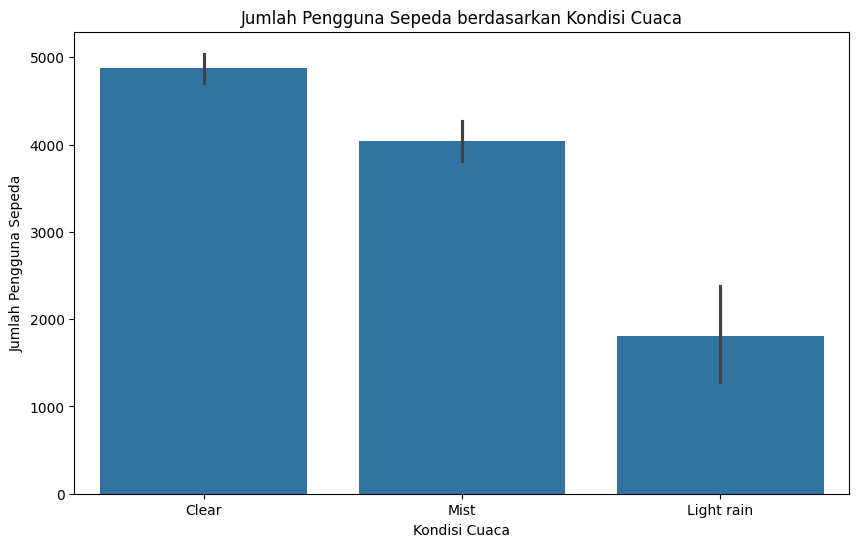

In [ ]:
plt.figure(figsize=(10, 6))

sorted_day_df = day_df.sort_values(by='total_rentals', ascending=False)

sns.barplot(
    x='weathersit',
    y='total_rentals',
    data=sorted_day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


Dari hasil visualisasi data tersebut, dapat disimpulkan bahwa terdapat korelasi yang jelas antara kondisi cuaca dan jumlah penyewa sepeda. Cuaca yang cerah menunjukkan tingkat minat yang paling tinggi, diikuti oleh cuaca berkabut atau mendung, dan kondisi cuaca yang hujan menjadi yang paling kurang diminati.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda pada hari kerja (workingday), hari libur(holiday), dan hari biasa(weekday)?

<ipython-input-309-cb8bfd1e0b58>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-309-cb8bfd1e0b58>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-309-cb8bfd1e0b58>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


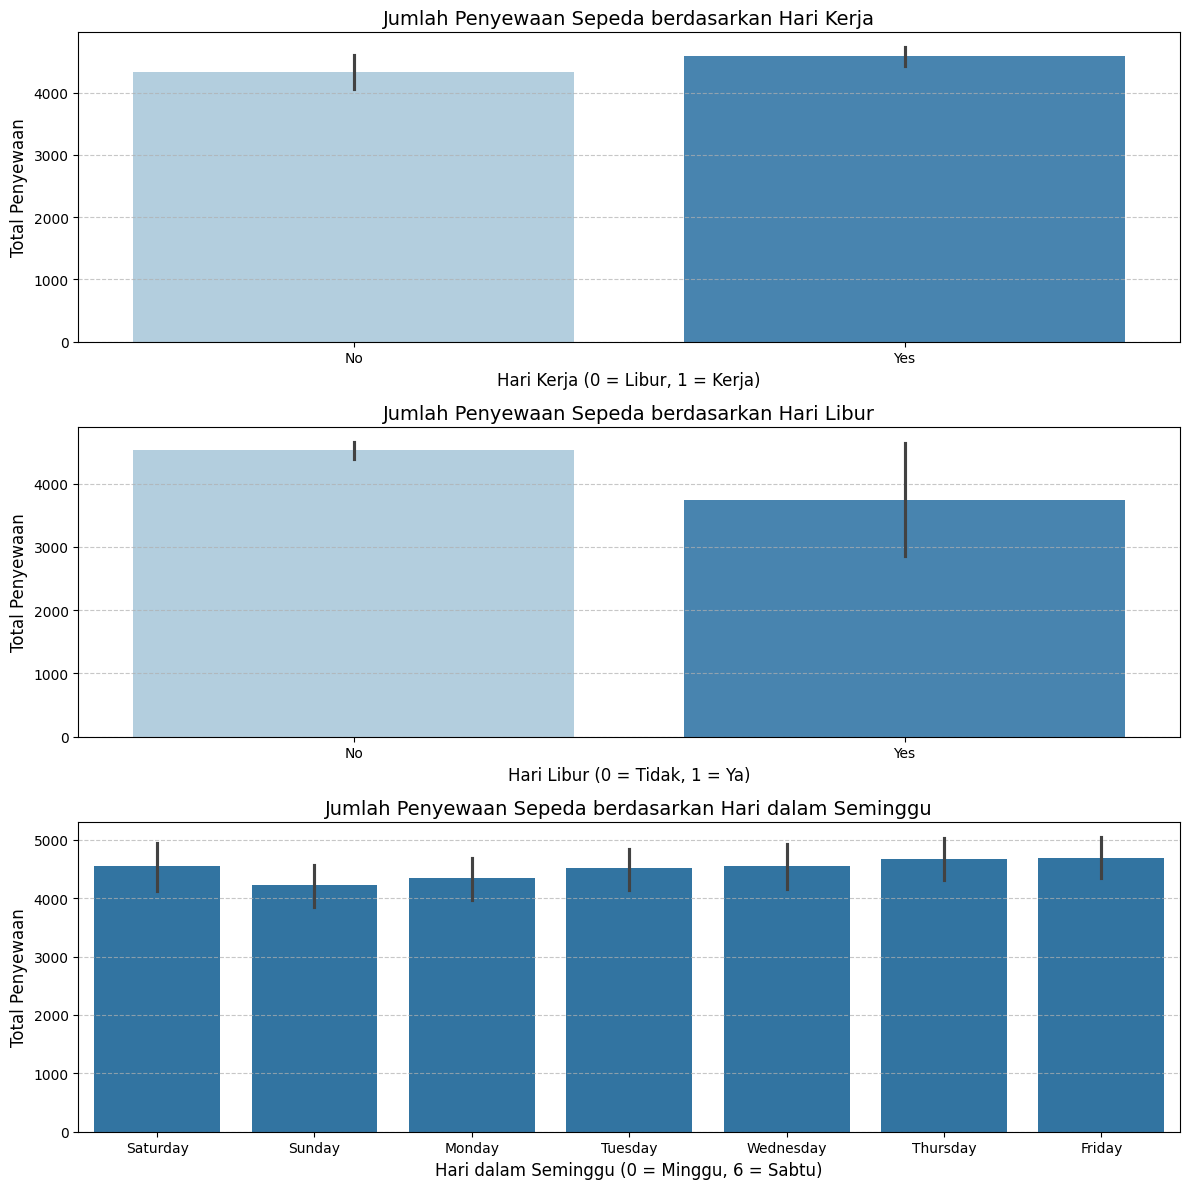

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
colors = ["#1f77b4","#1f77b4","#1f77b4","#1f77b4","#1f77b4","#1f77b4","#1f77b4"]

sns.barplot(
    x='workingday',
    y='total_rentals',
    data=day_df,
    ax=axes[0],
    palette="Blues")
axes[0].set_title('Jumlah Penyewaan Sepeda berdasarkan Hari Kerja', fontsize=14)
axes[0].set_xlabel('Hari Kerja (0 = Libur, 1 = Kerja)', fontsize=12)
axes[0].set_ylabel('Total Penyewaan', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(
    x='holiday',
    y='total_rentals',
    data=day_df,
    ax=axes[1],
    palette="Blues")
axes[1].set_title('Jumlah Penyewaan Sepeda berdasarkan Hari Libur', fontsize=14)
axes[1].set_xlabel('Hari Libur (0 = Tidak, 1 = Ya)', fontsize=12)
axes[1].set_ylabel('Total Penyewaan', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)



sns.barplot(
    x='weekday',
    y='total_rentals',
    data=day_df,
    ax=axes[2],
    palette=colors)

axes[2].set_title('Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu', fontsize=14)
axes[2].set_xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)', fontsize=12)
axes[2].set_ylabel('Total Penyewaan', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data menggunakan barplot, jumlah penyewa sepeda lebih banyak pada hari kerja (Senin–Jumat) dibandingkan akhir pekan (Sabtu dan Minggu), dengan hari kerja ditandai sebagai 1 dan akhir pekan sebagai 0. Selain itu, penyewaan sepeda cenderung lebih tinggi pada hari biasa dibandingkan hari libur nasional. Secara spesifik, Jumat mencatat jumlah penyewa terbanyak, sementara Minggu memiliki jumlah penyewa paling sedikit.

### Pertanyaan 3: Pada periode waktu manakah—pagi, siang, sore, atau malam—penyewaan sepeda paling tinggi dan paling rendah?

<ipython-input-310-2df404479adf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_group, x="time_of_day", y="total_rentals", palette=colors)


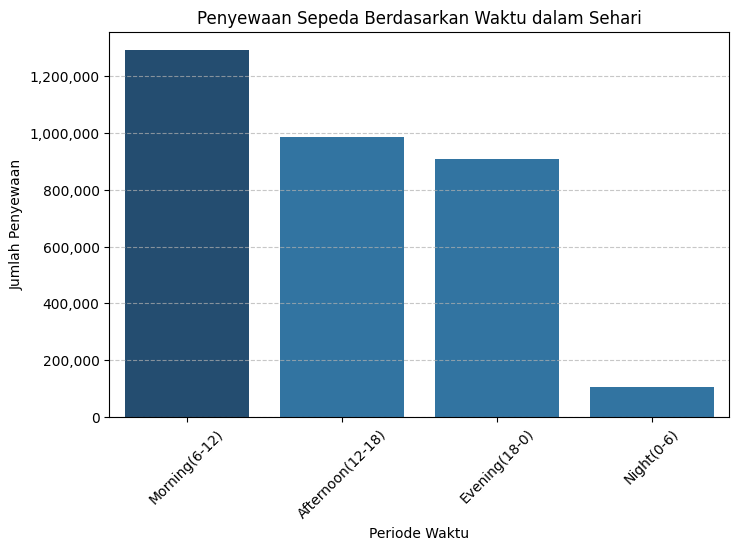

In [ ]:
colors = ['#174e7d','#1f77b4','#1f77b4','#1f77b4']
time_group = hour_df.groupby("time_of_day")["total_rentals"].sum().reset_index()

time_order = ["Morning", "Afternoon", "Evening", "Night"]
time_group = time_group.set_index("time_of_day").reindex(time_order).reset_index().sort_values(by="time_of_day")


time_labels = ["Morning(6-12)", "Afternoon(12-18)", "Evening(18-0)", "Night(0-6)"]

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')

plt.figure(figsize=(8, 5))
sns.barplot(data=time_group, x="time_of_day", y="total_rentals", palette=colors)

plt.xticks(ticks=range(len(time_labels)), labels=time_labels, rotation=45)

plt.gca().yaxis.set_major_formatter(formatter)


plt.title("Penyewaan Sepeda Berdasarkan Waktu dalam Sehari")
plt.xlabel("Periode Waktu")
plt.ylabel("Jumlah Penyewaan")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Penyewaan sepeda paling tinggi terjadi pada rentang waktu pagi (06:00 - 12:00), sedangkan penyewaan paling rendah terjadi pada rentang waktu malam (00:00 - 02:00). Pola ini menunjukkan bahwa penyewaan sepeda lebih aktif pada pagi hari dan cenderung menurun pada malam hari.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Dari analisis yang dilakukan, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Cuaca cerah menunjukkan minat penyewaan yang paling tinggi, sementara cuaca berkabut atau mendung juga menunjukkan tingkat penyewaan yang cukup baik. Sebaliknya, kondisi cuaca hujan menunjukkan minat penyewaan yang paling rendah, mengindikasikan bahwa hujan berpotensi mengurangi aktivitas penyewaan sepeda.

- Conclution pertanyaan 2

Penyewaan sepeda lebih tinggi pada hari kerja (Senin hingga Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu). Hal ini menunjukkan bahwa orang cenderung lebih aktif menggunakan sepeda selama hari kerja. Selain itu, hari biasa (weekday) mencatatkan jumlah penyewaan yang lebih tinggi dibandingkan dengan hari libur nasional (holiday), dengan Jumat sebagai hari dengan jumlah penyewaan tertinggi dan Minggu sebagai hari dengan jumlah penyewaan paling rendah.

- Conclution pertanyaan 3

Penyewaan sepeda mencapai puncaknya pada periode pagi (06:00 - 12:00), yang menunjukkan bahwa banyak orang menggunakan sepeda di pagi hari, mungkin untuk keperluan bekerja atau aktivitas lainnya. Sebaliknya, penyewaan paling rendah terjadi pada periode malam (00:00 - 02:00), yang menunjukkan penurunan minat menggunakan sepeda pada waktu malam. Pola ini mencerminkan kebiasaan penggunaan sepeda yang lebih aktif di siang dan pagi hari.

In [ ]:


# Export the cleaned hour dataset
hour_df.to_csv('cleaned_hour_data.csv', index=False)

# Export the cleaned day dataset
day_df.to_csv('cleaned_day_data.csv', index=False)
